# **Credit Card Fraud Detection**

#Introduction

Welcome to the "Credit Card Fraud Detection" Colab notebook. In this project, we will delve into the realm of anomaly detection and fraud prevention in credit card transactions using machine learning. The security and integrity of financial transactions are of utmost importance, and the ability to accurately identify fraudulent activities is crucial. Throughout this notebook, we will explore a dataset containing credit card transactions and employ various machine learning techniques to develop a robust fraud detection model. By leveraging Python's powerful data analysis and machine learning libraries, we will preprocess the data, visualize patterns, and train models to identify potentially fraudulent transactions. Join us on this journey to build a reliable and efficient Credit Card Fraud Detection system that contributes to enhancing financial security.

##Importing Liberies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_set= pd.read_csv('/content/drive/MyDrive/codsoft/Task: 2/Dataset/FraudTest.csv', encoding='ISO-8859-1')
train_set= pd.read_csv('/content/drive/MyDrive/codsoft/Task: 2/Dataset/FraudTrain.csv', encoding='ISO-8859-1')

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


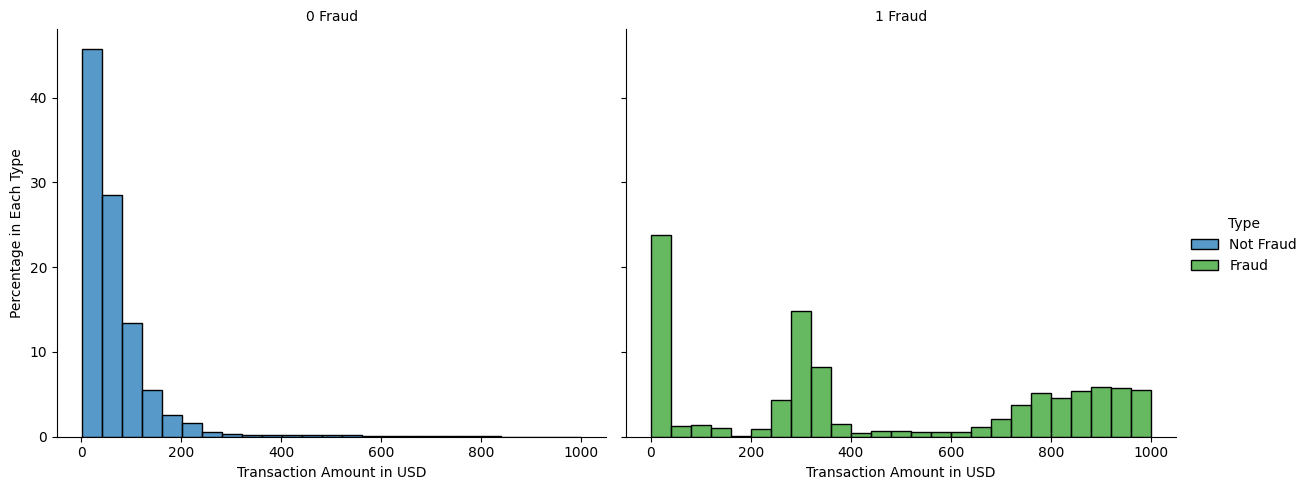

In [ ]:
filtered_data = train_set[train_set.amt <= 1000]
colors = ["#1f78b7", "#33a02c"]
g = sns.FacetGrid(filtered_data, col="is_fraud", hue="is_fraud", col_wrap=2, height=5, aspect=1.2, palette=colors)
g.map(sns.histplot, 'amt', bins=25, stat='percent', common_norm=False, multiple='dodge')
g.set_axis_labels("Transaction Amount in USD", "Percentage in Each Type")
g.set_titles("{col_name} Fraud")
g.add_legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.show()

<ipython-input-9-19e5fa260444>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='category', x='percentage_difference', data=merged_percentages.sort_values('percentage_difference', ascending=False), palette='coolwarm')


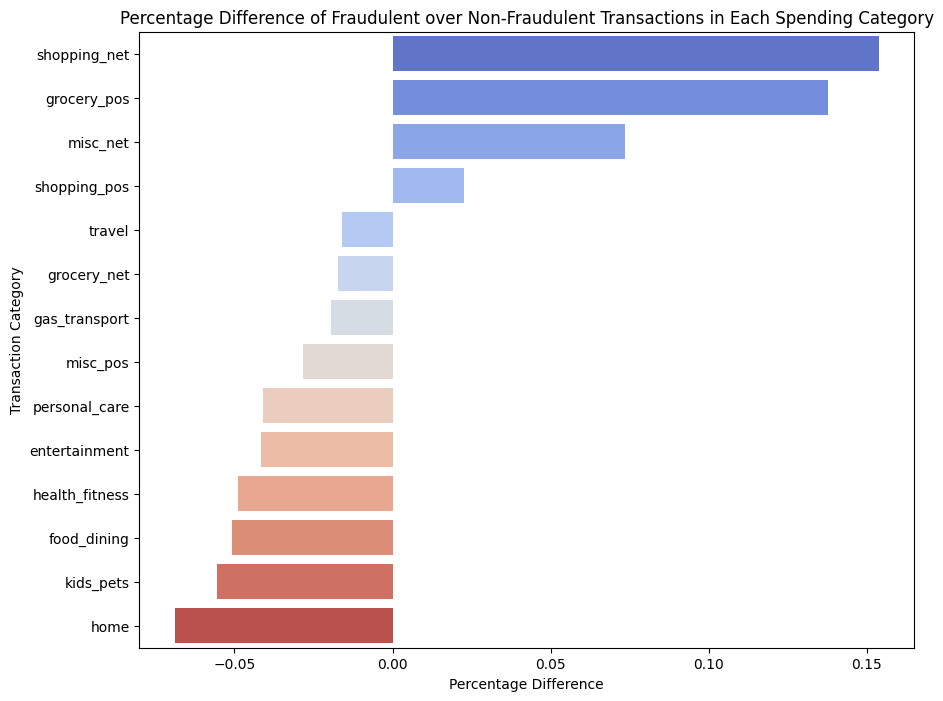

In [ ]:
not_fraud_percentages = train_set[train_set['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
not_fraud_percentages.columns = ['category', 'not_fraud_percentage']
fraud_percentages = train_set[train_set['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_percentages.columns = ['category', 'fraud_percentage']
merged_percentages = not_fraud_percentages.merge(fraud_percentages, on='category')
merged_percentages['percentage_difference'] = merged_percentages['fraud_percentage'] - merged_percentages['not_fraud_percentage']
plt.figure(figsize=(10, 8))
ax = sns.barplot(y='category', x='percentage_difference', data=merged_percentages.sort_values('percentage_difference', ascending=False), palette='coolwarm')
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Percentage Difference of Fraudulent over Non-Fraudulent Transactions in Each Spending Category')
plt.show()

## Cleaning Data and Spliting Data into Features and Target

In [ ]:
X = train_set.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street','city', 'state','job','trans_num', 'dob', 'is_fraud'], axis=1)
y = train_set['is_fraud']

In [ ]:
X.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
X_test= test_set.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street','city', 'state','job','trans_num', 'dob', 'is_fraud'], axis=1)
y_test= test_set['is_fraud']

## Spliting the Data into Training set and Cross-Validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_corss_val, y_train, y_cross_val= train_test_split(X, y, test_size= 0.30, random_state= 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_corss_val = sc.transform(X_corss_val)
X_test= sc.transform(X_test)

## Traning the model using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

## Predicting the Model on Cross Validation Set

In [ ]:
pred_lr= model_lr.predict(X_corss_val)
con_array = np.concatenate((pred_lr.reshape(len(pred_lr), 1), y_cross_val.to_numpy().reshape(len(y_cross_val), 1)), 1)
print(con_array[:100, :])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


##Classification Report Confusion Matrix and Accuracy Score for Cross Validation Set

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report_lr = classification_report(y_cross_val, pred_lr, zero_division=0)
acc_lr = accuracy_score(y_cross_val, pred_lr)
print(f"\nLogistic Regression Model Evaluation on Cross-Validation Set:")
print(f"\nValidation Accuracy: {acc_lr:.4f}")
print("\nClassification Report:\n", report_lr)


Logistic Regression Model Evaluation on Cross-Validation Set:

Validation Accuracy: 0.9936

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    386727
           1       0.00      0.00      0.00      2276

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



In [ ]:
cm = confusion_matrix(y_cross_val, pred_lr)
print(cm)
accuracy_score(y_cross_val, pred_lr)

[[386526    201]
 [  2276      0]]


0.9936324398526489

## Predicting the Model on Test set

In [ ]:
test_pred_lr= model_lr.predict(X_test)
con_array = np.concatenate((test_pred_lr.reshape(len(test_pred_lr), 1), y_test.to_numpy().reshape(len(y_test), 1)), 1)
print(con_array[:100, :])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


##Classification Report and Accuracy Score for Test Set

In [ ]:
acc = accuracy_score(y_test, test_pred_lr)
print("Test Accuracy:", acc)
print(classification_report(y_test, test_pred_lr))

Test Accuracy: 0.9955517086873042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



## Traning the model using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting the Model on Cross Validation Set

In [ ]:
pred_rf= model_rf.predict(X_corss_val)
con_array = np.concatenate((pred_rf.reshape(len(pred_rf ), 1), y_cross_val.to_numpy().reshape(len(y_cross_val), 1)), 1)
print(con_array[:100, :])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


##Classification Report and Accuracy Score for Cross Validation Set

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
report_rf = classification_report(y_cross_val, pred_rf, zero_division=0)
acc_rf = accuracy_score(y_cross_val, pred_rf)
print(f"\nRandom Forest Classifier Model Evaluation on Cross-Validation Set:")
print(f"\nValidation Accuracy: {acc_rf:.4f}")
print("\nClassification Report:\n", report_rf)


Random Forest Classifier Model Evaluation on Cross-Validation Set:

Validation Accuracy: 0.9963

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386727
           1       0.85      0.45      0.59      2276

    accuracy                           1.00    389003
   macro avg       0.92      0.73      0.79    389003
weighted avg       1.00      1.00      1.00    389003



## Predicting the Model on Test set

In [ ]:
test_pred_rf= model_rf.predict(X_test)
con_array = np.concatenate((test_pred_rf.reshape(len(test_pred_rf), 1), y_test.to_numpy().reshape(len(y_test), 1)), 1)
print(con_array[:100, :])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


##Classification Report and Accuracy Score for Test Set

In [ ]:
acc = accuracy_score(y_test, test_pred_rf)
print("Test Accuracy:", acc)
print(classification_report(y_test, test_pred_rf))

Test Accuracy: 0.995798236158922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.36      0.11      0.17      2145

    accuracy                           1.00    555719
   macro avg       0.68      0.56      0.58    555719
weighted avg       0.99      1.00      0.99    555719



# Summary

The "Credit Card Fraud Detection" Colab notebook explores the realm of anomaly detection and fraud prevention in credit card transactions using machine learning. Leveraging Python's data analysis and machine learning libraries, the project preprocesses the dataset, visualizes patterns, and trains models to identify potentially fraudulent transactions. The visualization section showcases transaction amounts and spending category differences between fraudulent and non-fraudulent transactions. The data is cleaned, split into features and target variables, and undergoes feature scaling. Logistic Regression and Random Forest Classifier models are trained, evaluated on the cross-validation set, and tested on the provided test set. Both models demonstrate high accuracy, with Logistic Regression achieving 99.36% accuracy on the cross-validation set and 99.56% accuracy on the test set, and Random Forest Classifier achieving 99.63% accuracy on the cross-validation set and 99.58% accuracy on the test set. Overall, the models showcase robust performance in identifying credit card fraud, contributing to enhanced financial security.